In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

    run_1  run_2  run_3  run_4  run_5
0     NaN    NaN    NaN    NaN    NaN
1     NaN    NaN    NaN    NaN    NaN
2     0.0    NaN    0.0    NaN    NaN
3    68.0    NaN   44.0    NaN    NaN
4    45.0    NaN   45.0    NaN    NaN
5     0.0    NaN   45.0    0.0    0.0
6     NaN    NaN    0.0   42.0   23.0
7     NaN    0.0    NaN   39.0   45.0
8     NaN   25.0    NaN   35.0    8.0
9     NaN   49.0    NaN    0.0    0.0
10    NaN    0.0    NaN    NaN    NaN


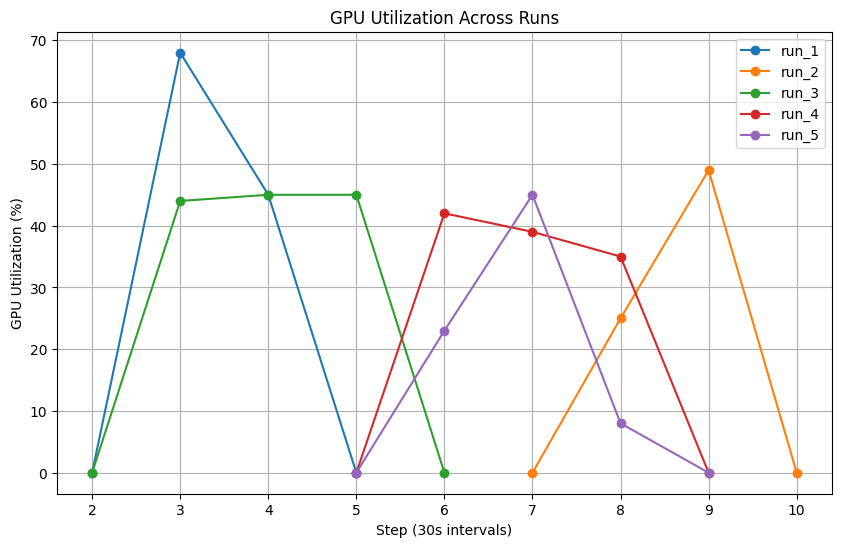

In [23]:
# GPU Utilization Auto

path = "./data/auto/gpu-utilization"

# Load all CSV files
csv_files = glob.glob(path + "/*.csv")

dfs = [pd.read_csv(file, usecols=["GPU 0"]) for file in csv_files]

# clean
for i, df in enumerate(dfs):
    dfs[i]["GPU 0"] = (
        df["GPU 0"]
        .astype(str)
        .str.replace("%", "", regex=False)
        .replace("", 0)
        .astype(float)
    )


combined = pd.concat(dfs, axis=1)
combined.columns = [f"run_{i + 1}" for i in range(len(dfs))]
combined.fillna(0)
print(combined)


plt.figure(figsize=(10,6))

for col in combined.columns:
    plt.plot(combined.index, combined[col], marker="o", label=col)

plt.xlabel("Step (30s intervals)")
plt.ylabel("GPU Utilization (%)")
plt.title("GPU Utilization Across Runs")
plt.legend()
plt.grid(True)
plt.show()

